In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from datetime import timedelta, datetime
import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from scipy.stats import pearsonr

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


GDP per capita:

In [2]:
GDP_data = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_1429392.csv', skiprows = 4)
GDP_data = GDP_data.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = GDP_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))
#raw_data.isna().sum().head(50)

Missing value raio: 14.15/60 = 23.58%


In [3]:
GDP_data[GDP_data['Country Name'] == 'Germany'].values

array([['Germany', 'DEU', nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, 2761.16683631154, 3192.1336177736, 3809.9814472330895,
        5046.75510676642, 5639.07761842548, 6236.358885340501,
        6634.85689909309, 7682.953776006421, 9482.04284590652,
        11281.0233217764, 12138.3081048011, 10209.073113177099,
        9913.73764365182, 9864.3449403866, 9313.169414196529,
        9429.56921260612, 13461.8310057324, 16677.5107867621,
        17931.282325738, 17764.3764392283, 22303.9613327585,
        23357.757725073, 26438.2303888417, 25522.629573361803,
        27076.60675014, 31658.349378913503, 30485.8665482279,
        26964.0494672673, 27289.0593603191, 26725.9152182573,
        23635.929220397702, 23607.882855392203, 25077.7290759602,
        30243.5765296979, 34044.0536341248, 34507.368814233196,
        36323.4477421822, 41587.2128984264, 45427.151677489004,
        41485.9016495139, 41531.934197868904, 46644.776027968,
        43858.3630551076, 46285.7640688407

GDP total:

In [4]:
GDP_data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.993281,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN,NaN
1,Afghanistan,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,...,591.162759,641.871479,637.165523,613.856689,578.466353,547.228110,556.302002,524.162881,502.115487,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2973.591160,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5352.857411,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43335.328862,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3741.875052,3596.804655,3891.266363,4080.330717,3603.025501,3780.003689,4045.614209,4419.914327,4417.509940,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374.621285,1446.536354,1607.152365,1673.146354,1395.439633,1033.733043,882.395759,968.159048,NaN,NaN
261,South Africa,ZAF,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,621.220825,675.135312,...,8007.412846,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196,6001.400814,NaN
262,Zambia,ZMB,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,343.373483,360.201618,...,1672.908251,1763.072733,1878.907001,1763.057298,1337.796110,1280.578898,1534.865371,1556.334482,1291.343357,NaN


In [4]:
GDP_data_2 = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1495053.csv', skiprows = 4)
GDP_data_2 = GDP_data_2.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = GDP_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))

Missing value raio: 14.15/60 = 23.58%


In [5]:
CO2_data = pd.read_csv('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1429804.csv', skiprows = 4)
CO2_data = CO2_data.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = CO2_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))
#raw_data.isna().sum().head(50)

Missing value raio: 22.97/60 = 38.29%


In [6]:
CO2_data_2 = pd.read_csv('annual-co-emissions-by-region.csv')
CO2_data_2 = CO2_data_2[CO2_data_2['Year'] >= 1960]
CO2_data_2.reset_index(drop = True, inplace = True)
df = pd.DataFrame(columns = GDP_data.columns)
#df

In [7]:
df = pd.DataFrame(columns = GDP_data.columns)
df['Country Name'] = GDP_data['Country Name']
df['Country Code'] = GDP_data['Country Code']
for i in range(CO2_data_2.index.size):
    row = CO2_data_2.loc[i]
    #df[df['Country Name'] == row['Entity']][str(row['Year'])] = row['Annual CO2 emissions']
    df.loc[df['Country Name'] == row['Entity'], str(row['Year'])] = row['Annual CO2 emissions']
df[df['Country Name'] == 'North America']
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,0.618561,0.645553,0.708942,0.679088,0.660275,0.592387,0.553944,0.682359,...,2.49885,1.34835,0.86104,0.872032,0.89768,0.883024,0.89074,0.897147,NaN,NaN
1,Afghanistan,AFG,0.413885,0.490798,0.688594,0.706736,0.838551,1.00692,1.09116,1.28187,...,12.226,10.7421,9.03678,8.44988,9.01951,8.65335,8.97107,9.43879,NaN,NaN
2,Angola,AGO,0.548951,0.453707,1.17913,1.14972,1.22291,1.18616,1.55247,0.991815,...,30.3297,33.8006,33.2285,44.2489,33.979,34.1109,34.112,34.5372,NaN,NaN
3,Albania,ALB,2.02253,2.27901,2.46221,2.08115,2.0152,2.17275,2.55014,2.67838,...,5.23586,4.92075,4.90976,5.48501,4.61298,4.53237,4.65135,4.56996,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.490976,0.487312,0.47632,0.461664,0.465328,0.468992,0.482251,0.470909,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.36125,7.93622,8.06813,7.25472,8.40155,8.9365,8.92947,8.88676,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,97.8435,102.12,105.67,109.725,119.546,128.14,128.235,133.76,...,475.814,462.949,457.441,482.764,462.3,474.981,462.812,467.562,NaN,NaN
262,Zambia,ZMB,4.35526,3.70897,3.58269,3.44449,3.27499,3.91226,3.49823,4.78763,...,2.78152,3.4891,3.75614,4.25573,4.29582,4.83785,5.12156,5.22804,NaN,NaN


In [8]:
# 1960 - 2018
def corr_by_country(name):
    x = GDP_data_2[GDP_data_2['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    y = df[df['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    while len(x) > 0 and len(y) > 0 and (pd.isna(x[0]) or pd.isna(y[0])):
        x = x[1:]
        y = y[1:]
    if len(x) > 0 and len(y) > 0:
        corr, _ = pearsonr(x, y)
    else:
        corr = pd.NA
    return x, y, corr

def corr_by_country_PC(name):
    x = GDP_data[GDP_data['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    y = df[df['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    while len(x) > 0 and len(y) > 0 and (pd.isna(x[0]) or pd.isna(y[0])):
        x = x[1:]
        y = y[1:]
    if len(x) > 0 and len(y) > 0:
        corr, _ = pearsonr(x, y)
    else:
        corr = pd.NA
    return x, y, corr

In [9]:
mean_corr = 0
mean_corr_2 = 0
corr_list = []
corr_PC_list = []
n1 = 0
n2 = 0
for index, row in df.iterrows():
    _, _, corr = corr_by_country(row['Country Name'])
    corr_list.append(corr)
    if not pd.isna(corr):
        n1 += 1
        mean_corr += corr
    
    _, _, corr = corr_by_country_PC(row['Country Name'])
    corr_PC_list.append(corr)
    if not pd.isna(corr):
        n2 += 1
        mean_corr_2 += corr
mean_corr /= n1
mean_corr_2 /= n2
print("Mean corr = ", mean_corr)
print("Mean corr PC = ", mean_corr_2)

Mean corr =  0.6533176371463502
Mean corr PC =  0.63836684099107


In [10]:
df1 = df.drop(['2019', '2020'], axis = 'columns')
df1['Corr'] = corr_list
df1['Corr PC'] = corr_PC_list
df1 = df1.sort_values(by=['2018'], ascending = False)
df1.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,Corr,Corr PC
257,World,WLD,9410.53,9452.11,9838.2,10379.1,10969.3,11466.2,12045.6,12431,...,34357.4,34919.3,35207.9,35505.8,35462.7,35675.1,36153.3,36572.8,0.968426,0.981819
38,China,CHN,778.979,550.959,439.342,435.518,435.704,474.681,521.459,432.224,...,9388.2,9633.9,9796.53,9820.36,9716.47,9704.48,9838.75,10064.7,0.928588,0.933004
168,North America,NAC,3179.81,3175.03,3299.67,3431.66,3609.69,3760.3,3944.27,4115.02,...,6805.62,6613.5,6767.7,6808.88,6662.18,6535.3,6513.05,6645.03,0.812801,0.850652
249,United States,USA,2887.82,2877.37,2984,3116.02,3252.76,3388.19,3559.18,3693.3,...,5572.58,5371.78,5522.91,5572.11,5422.97,5306.66,5270.75,5416.28,0.76455,0.805148
107,India,IND,120.576,130.393,143.452,154.068,150.639,165.961,171.688,172.093,...,1811.96,1979.05,1994.1,2199.4,2298.17,2371.75,2456.95,2654.1,0.972368,0.975817


In [11]:
df2 = pd.DataFrame()
df2['Country Name'] = df1['Country Name']
df2['CO2 2018'] = df1['2018']
df2['GDP_Corr'] = df1['Corr']
df2['GDP_PC_Corr'] = df1['Corr PC']
df2.head(15)

,Country Name,CO2 2018,GDP_Corr,GDP_PC_Corr
257,World,36572.8,0.968426,0.981819
38,China,10064.7,0.928588,0.933004
168,North America,6645.03,0.812801,0.850652
249,United States,5416.28,0.76455,0.805148
107,India,2654.1,0.972368,0.975817
117,Japan,1161.98,0.871705,0.875774
53,Germany,759.002,-0.934258,-0.930368
203,Saudi Arabia,621.302,0.946607,0.850619
104,Indonesia,614.916,0.921116,0.927406
33,Canada,568.412,0.824698,0.8556


# 1. Plot

## a) China - US - India - World

In [12]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"secondary_y": True},{"secondary_y": True}],
                           [{"secondary_y": True},{"secondary_y": True}]],
                   subplot_titles=("China", "US", "India", "World"))
#fig = go.Figure( layout=go.Layout(xaxis=dict(title = "Year", color = 'black'),
#    ))
#fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
                x=df1.transpose()[38][2:-2].index,
                y=df1.transpose()[38][2:-2],
                name="CO2 China",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 1,
              secondary_y = False,
             )

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[38][2:-2].index,
                y=GDP_data.transpose()[38][2:-2],
                name="GDP pc China",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 1,
              secondary_y = True
             )

fig.add_trace(go.Scatter(
                x=df1.transpose()[249][2:-2].index,
                y=df1.transpose()[249][2:-2],
                name="CO2 US",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 2,
              secondary_y = False
             )

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[249][2:-2].index,
                y=GDP_data.transpose()[249][2:-2],
                name="GDP pc US",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 2,
             secondary_y = True
             )
fig.add_trace(go.Scatter(
                x=df1.transpose()[107][2:-2].index,
                y=df1.transpose()[107][2:-2],
                name="CO2 India",
                line_width = 1.5,
                opacity=0.8),
             row = 2, col = 1,
              secondary_y = False
             )

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[107][2:-2].index,
                y=GDP_data.transpose()[107][2:-2],
                name="GDP pc India",
                line_width = 1.5,
                opacity=0.8),
             row = 2, col = 1,
             secondary_y = True
             )

fig.add_trace(go.Scatter(
                x=df1.transpose()[257][2:-2].index,
                y=df1.transpose()[257][2:-2],
                name="CO2 World",
                line_width = 1.5,
                opacity=0.8),
             row = 2, col = 2,
              secondary_y = False
             )

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[257][2:-2].index,
                y=GDP_data.transpose()[257][2:-2],
                name="GDP pc World",
                line_width = 1.5,
                opacity=0.8),
             row = 2, col = 2,
             secondary_y = True
             )


# Use date string to set xaxis range
fig.update_layout(title_text = "GDP per capita vs CO2 emissions", 
                  title_x=0.5, title_font_size = 22, legend_y = 0.5,showlegend=False,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.update_yaxes(title_text="CO2 (mm)", secondary_y=False)
fig.update_yaxes(title_text="GDP (thousand USD)", secondary_y=True)
fig.show()

## b) Germany - negative correlation example

In [13]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
                x=df1.transpose()[53][2:-2].index,
                y=df1.transpose()[53][2:-2],
                name="CO2 Germany",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 1,
              secondary_y = False,
             )

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[53][2:-2].index,
                y=GDP_data.transpose()[53][2:-2],
                name="GDP pc Germany",
                line_width = 1.5,
                opacity=0.8),
             row = 1, col = 1,
              secondary_y = True
             )

fig.update_layout(title_text = "GDP per capita vs CO2 emissions (Germany)", 
                  title_x=0.5, title_font_size = 22, legend_y = 0.5,showlegend=False,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.update_yaxes(title_text="CO2 (mm)", secondary_y=False)
fig.update_yaxes(title_text="GDP (thousand USD)", secondary_y=True)
fig.show()

# 2. Prediction

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## a) Set up train and test dataset

We take China's CO2 to apply the model

In [15]:
df1.transpose()[38][2:-2]
df2 = pd.DataFrame()
df2['CO2'] = df1.transpose()[38][2:-2]
df2_b2010 = df2.iloc[:50]
df2_a2010 = df2.iloc[50:]

## b) Polynomial Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
LR = LinearRegression()
x = df2_b2010.index.values.reshape(-1, 1)
x_futureyears = df2_a2010.index.values.reshape(-1, 1)
y = df2_b2010['CO2']
poly_features = PolynomialFeatures(degree = 5)
x_poly = poly_features.fit_transform(x)
x_futureyears_poly = poly_features.fit_transform(x_futureyears)
LR.fit(x_poly, y)
poly_pred = LR.predict(x_futureyears_poly)
poly_pred

array([ 7793.14364828,  8293.81078328,  8821.28679992,  9376.36181904,
        9959.82820047, 10572.48054458, 11215.11569418, 11888.53273715,
       12593.53300942])

In [17]:
print("MSE:", mean_squared_error(df2_a2010['CO2'], poly_pred))
print("RMSE:", np.sqrt(mean_squared_error(df2_a2010['CO2'], poly_pred)))
print("MAE:", mean_absolute_error(df2_a2010['CO2'], poly_pred))
print("R square score:", r2_score(df2_a2010['CO2'], poly_pred))

MSE: 1796207.7638216238
RMSE: 1340.226758359056
MAE: 1124.367559620583
R square score: -8.863493577562625


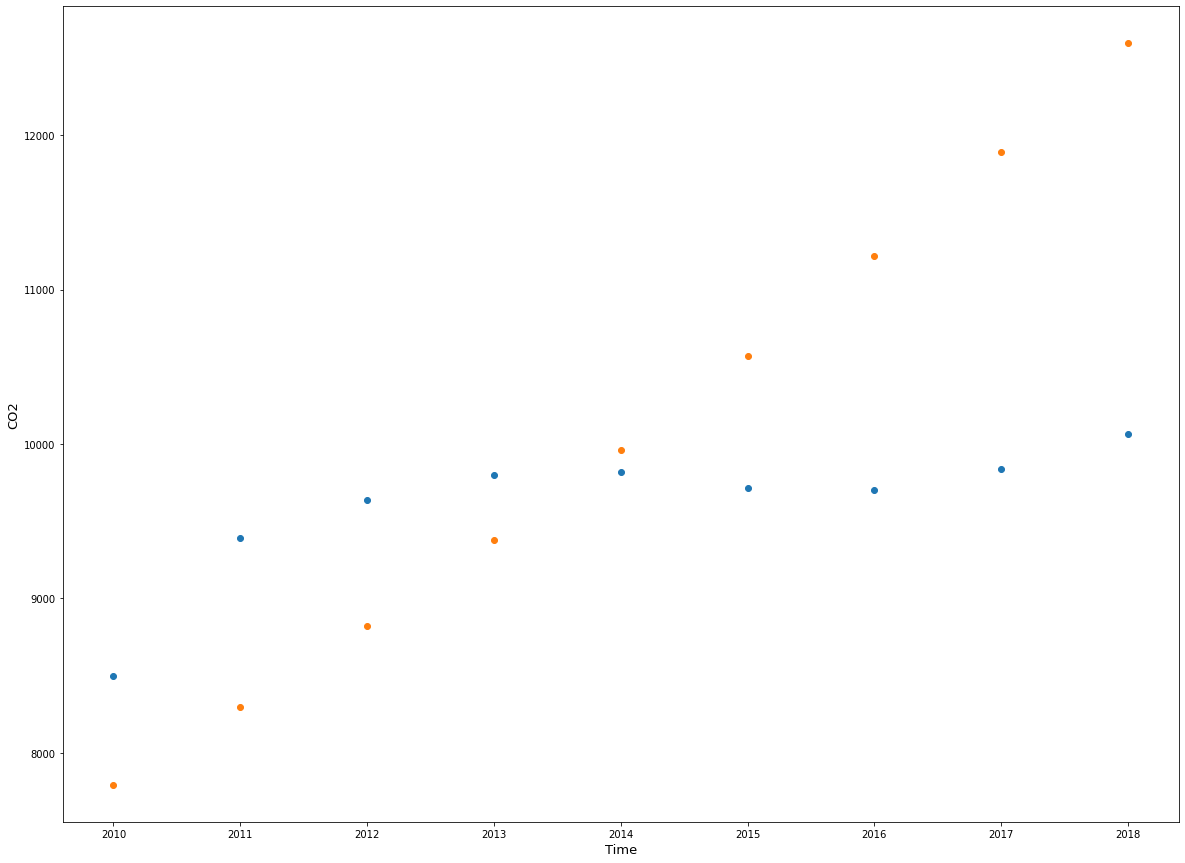

In [18]:
plt.figure(figsize = (20, 15))
plt.scatter(x = df2_a2010.index.values, y = df2_a2010['CO2'])
plt.scatter(x = df2_a2010.index.values, y = poly_pred)
plt.ylabel('CO2', fontsize=13)
plt.xlabel('Time', fontsize=13)
plt.show()